In [1]:
import pickle
import os
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter
from random import sample

from skimage import io
from skimage import transform as tf
from IPython.display import Image, display
from PIL import Image, ImageEnhance

import os
import shutil

In [36]:
vecs = np.load('train_imgs_vecs.npy')

with open('train_imgs_files_list.pkl', 'rb') as f:
    files_list = pickle.load(f)

with open('train_imgs_labels_list.pkl', 'rb') as f:
    label_list = pickle.load(f)

In [37]:
pca = PCA(n_components=300)
vecs_to_kmeans = pca.fit_transform(vecs)

pca = PCA(n_components=2)
vecs_vis = pca.fit_transform(vecs)

i


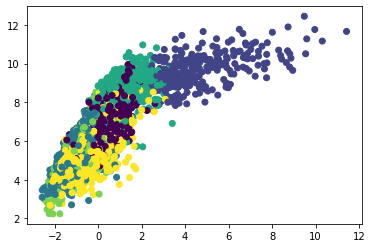

ii


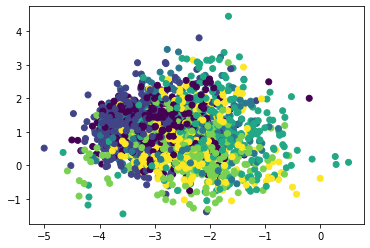

iii


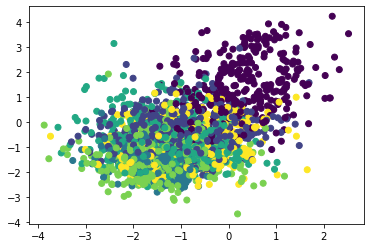

iv


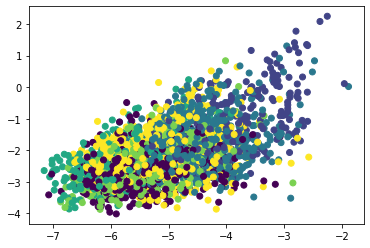

ix


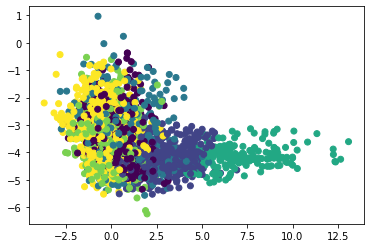

v


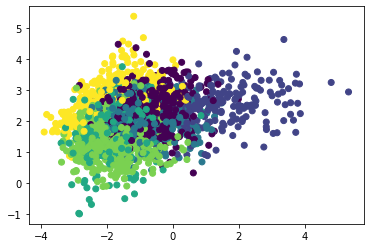

vi


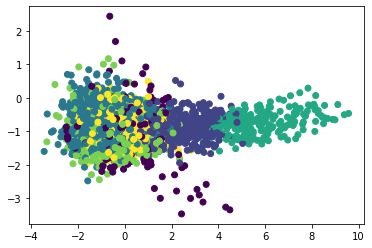

vii


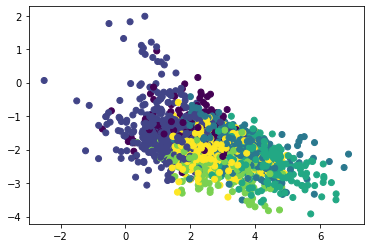

viii


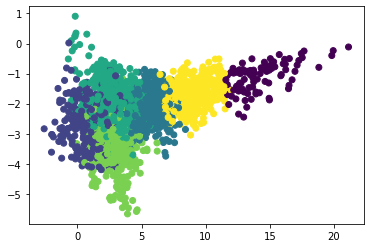

x


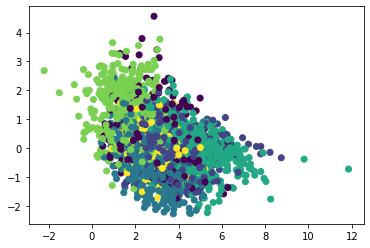

In [38]:
classes = ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']
chosen_files_kmeans_sample = {c: [] for c in classes}
k = 6

for c in ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']:
    rel_idxs = [i for i, l in enumerate(label_list) if l == c]
    rel_files = list(itemgetter(*rel_idxs)(files_list))
    number_of_files_in_c = len(rel_idxs)
    rel_vecs_vis = vecs_vis[rel_idxs]
    rel_vecs_km = vecs_to_kmeans[rel_idxs]
    c_clusters = KMeans(n_clusters=k, random_state=0).fit_predict(rel_vecs_km)
    cluster_dict = {i: [] for i in range(k)}
    for cluster, file in zip(c_clusters, rel_files):
        cluster_dict[cluster].append(file)
    cluster_count = dict(Counter(c_clusters))
    total_sample_c = 1000# int(0.75*number_of_files_in_c) #### originally 1000
    for cluster, count in cluster_count.items():
        num_to_sample = int(total_sample_c*count/number_of_files_in_c + 1)
        chosen_files_kmeans_sample[c] += sample(cluster_dict[cluster], num_to_sample)
    
    chosen_files_kmeans_sample[c] = sample(chosen_files_kmeans_sample[c], total_sample_c)
    
    print(c)
    plt.scatter(rel_vecs_vis[:,0], rel_vecs_vis[:,1], c=c_clusters)
    plt.show()

with open('kmeans_chosen_imgs_dict.pkl', 'wb') as f:
    pickle.dump(chosen_files_kmeans_sample, f)

In [5]:
chosen_files_random_sample = {c: [] for c in classes}

for c in ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']:
    rel_idxs = [i for i, l in enumerate(label_list) if l == c]
    rel_files = list(itemgetter(*rel_idxs)(files_list))
    chosen_files_random_sample[c] = sample(rel_files, len(chosen_files_kmeans_sample[c]))

with open('random_chosen_imgs_dict.pkl', 'wb') as f:
    pickle.dump(chosen_files_random_sample, f)

In [8]:
def create_dir(parent_dir, new_dir):
    path = os.path.join(parent_dir, new_dir)
    os.mkdir(path)
    return path

In [10]:
# create train, test and classes directories
os.mkdir('data_kmeans_sample')
create_dir('data_kmeans_sample', 'train')
create_dir('data_kmeans_sample', 'val')

for c in ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']:
    try:
        create_dir('data_kmeans_sample/train', c)
        create_dir('data_kmeans_sample/val', c)
    except:
        continue

In [11]:
# create a validation set based on the cleaned data only
for c in ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']:
    #shutil.copytree(f'data/val/{c}', f'data_kmeans_sample/val/{c}')
    dest_data_class_val_path = f'data_kmeans_sample/val/{c}'
    files_to_val = sample(chosen_files_kmeans_sample[c], 50)
    for f in files_to_val:
        shutil.copy(f, dest_data_class_val_path)
    
    dest_data_class_train_path = f'data_kmeans_sample/train/{c}'
    for f in chosen_files_kmeans_sample[c]:
        if f in files_to_val:
            continue
        shutil.copy(f, dest_data_class_train_path)

In [9]:
# create train, test and classes directories
os.mkdir('data_random_sample')
create_dir('data_random_sample', 'train')
create_dir('data_random_sample', 'val')

for c in ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']:
    try:
        create_dir('data_random_sample/train', c)
    except:
        continue

In [10]:
# create a validation set based on the cleaned data only
for c in ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']:
    shutil.copytree(f'data/val/{c}', f'data_random_sample/val/{c}')
    dest_data_class_train_path = f'data_random_sample/train/{c}'
    for f in chosen_files_random_sample[c]:
        shutil.copy(f, dest_data_class_train_path)

In [39]:
# plot image averages
classes = ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']
chosen_files_kmeans_sample = {c: [] for c in classes}
k = 6

for c in ['viii']:#, 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']:
    rel_idxs = [i for i, l in enumerate(label_list) if l == c]
    rel_files = list(itemgetter(*rel_idxs)(files_list))
    number_of_files_in_c = len(rel_idxs)
    rel_vecs_vis = vecs_vis[rel_idxs]
    rel_vecs_km = vecs_to_kmeans[rel_idxs]
    c_clusters = KMeans(n_clusters=k, random_state=0).fit_predict(rel_vecs_km)
    cluster_dict = {i: [] for i in range(k)}
    for cluster, file in zip(c_clusters, rel_files):
        cluster_dict[cluster].append(file)   

In [40]:
cluster_dict_av = {} 
for c, files_list in cluster_dict.items():
    cluster_img = np.zeros((100, 100))
    counter = 0
    for f in files_list:
        img = tf.resize(io.imread(f), (100, 100))
        img = np.array(img)
        cluster_img += img
        counter += 1
    cluster_img = cluster_img/counter
    cluster_dict_av[c] = cluster_img

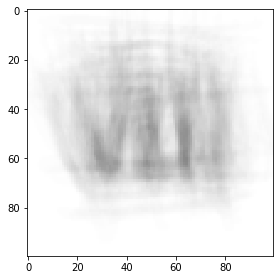

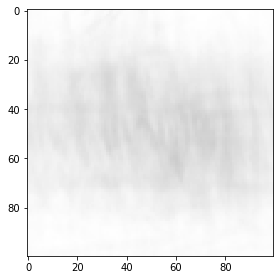

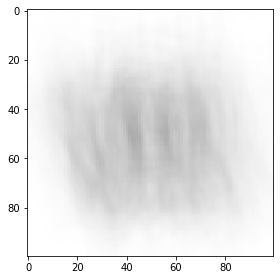

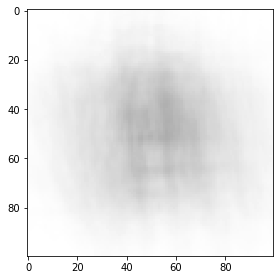

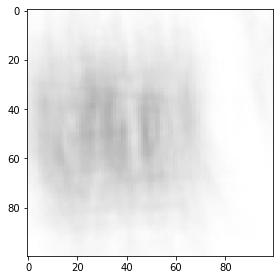

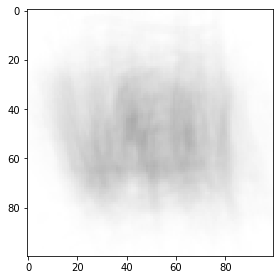

In [41]:
for c, img in cluster_dict_av.items():
    io.imshow(img)
    io.show()